# Driven dynamics with TLS

Here, we demonstrate the socket-free TLS workflow using the `maxwelllink.LaserDrivenSimulation` electromagnetic solver. By resonantly coupling one cosine driving field to a two-level system (TLS), we aim to monitor the driven population dynamics of the TLS.

## 1. Defining Molecule

We first create a `Molecule` instance using the non-socket mode, i.e., we directly initialize the TLS within the `Molecule` class:

In [2]:
import numpy as np
import maxwelllink as mxl

frequency_au = 1.0
mu12 = 1

molecule = mxl.Molecule(
    driver="tls",
    driver_kwargs={
        "omega": frequency_au,
        "mu12": mu12,
        "orientation": 2,
        "pe_initial": 0e-3,
    }
)

[Init Molecule] Operating in non-socket mode, using driver: tls


## 2. Defining the driven field

Then, we create a `LaserDrivenSimulation` instance which defines the parameters for a custom driven field. The pre-defined `molecule` is also attached to this class for coupled light-matter simulations.


In [3]:

from maxwelllink.tools import cosine_drive

dt_au = 1e-1
total_steps = 4096

amplitude_au = 1e-1

sim = mxl.LaserDrivenSimulation(
    molecules=[molecule],
    coupling_axis="z",
    drive=cosine_drive(omega_au=frequency_au, amplitude_au=amplitude_au),
    dt_au=dt_au,
    record_history=True,
)

sim.run(steps=total_steps)

init TLSModel with dt = 0.100000 a.u., molecule ID = 0
[LaserDriven] Completed 1000/4096 [24.4%] steps, time/step: 5.03e-05 seconds, remaining time: 0.16 seconds.
[LaserDriven] Completed 2000/4096 [48.8%] steps, time/step: 4.77e-05 seconds, remaining time: 0.10 seconds.
[LaserDriven] Completed 3000/4096 [73.2%] steps, time/step: 4.27e-05 seconds, remaining time: 0.05 seconds.
[LaserDriven] Completed 4000/4096 [97.7%] steps, time/step: 4.34e-05 seconds, remaining time: 0.00 seconds.


## 3. Retrieve simulation observables

After the simulation, we can retrieve the TLS trajectory from `molecule.additional_data_history`.

In [4]:
population = np.array([entry["Pe"] for entry in molecule.additional_data_history])
tls_time_au = np.array([entry["time_au"] for entry in molecule.additional_data_history])


print(
    f"Collected {population.size} TLS samples."
)

Collected 4096 TLS samples.


## 4. Inspect time-domain Rabi oscillations

Because the TLS is at resonance with the classical cavity mode, Rabi oscillations can be observed for this coupled system.

According to the analytical rotating wave approximation, under resonance excitation, the excited-state population $P_{\rm e}(t)$ obeys:

$$
P_{\rm e}(t) = \sin^2(\frac{\Omega_{\rm R} t}{2}).
$$
where $\Omega_{\rm R} \equiv \mu_{12} E_0$. 



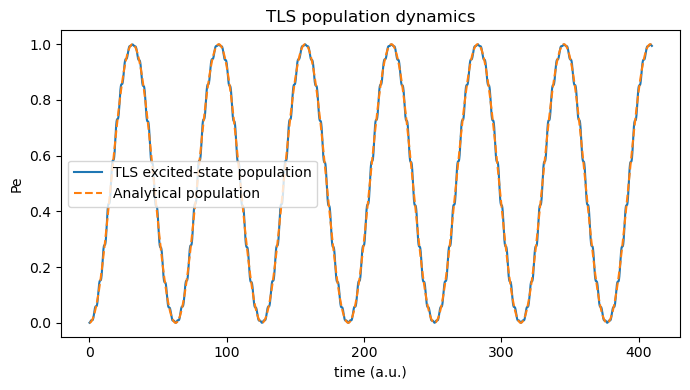

In [ ]:
import matplotlib.pyplot as plt

# analytical solution under RWA
Omega_R = mu12 * amplitude_au
population_analytical = np.sin(Omega_R * tls_time_au / 2) ** 2

plt.figure(figsize=(7, 4))
plt.plot(tls_time_au, population, label="TLS excited-state population")
plt.plot(tls_time_au, population_analytical, label="Analytical population", linestyle="--")
plt.xlabel("time (a.u.)")
plt.ylabel("Pe")
plt.title("TLS population dynamics")
plt.legend()
plt.tight_layout()
plt.show()